In [1]:
%load_ext autoreload
%autoreload 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import generate_data_second_order 
from models import ParametricLLFM
from models import GibbsSamplerLLFM


Average number of active features across iterations: 4.58
Average number of active features across iterations: 6.01
Average number of active features across iterations: 5.19
Average number of active features across iterations: 5.10
Average number of active features across iterations: 5.02
Average number of active features across iterations: 4.95
Average number of active features across iterations: 4.43
Average number of active features across iterations: 4.40
Average number of active features across iterations: 4.58
Average number of active features across iterations: 3.82


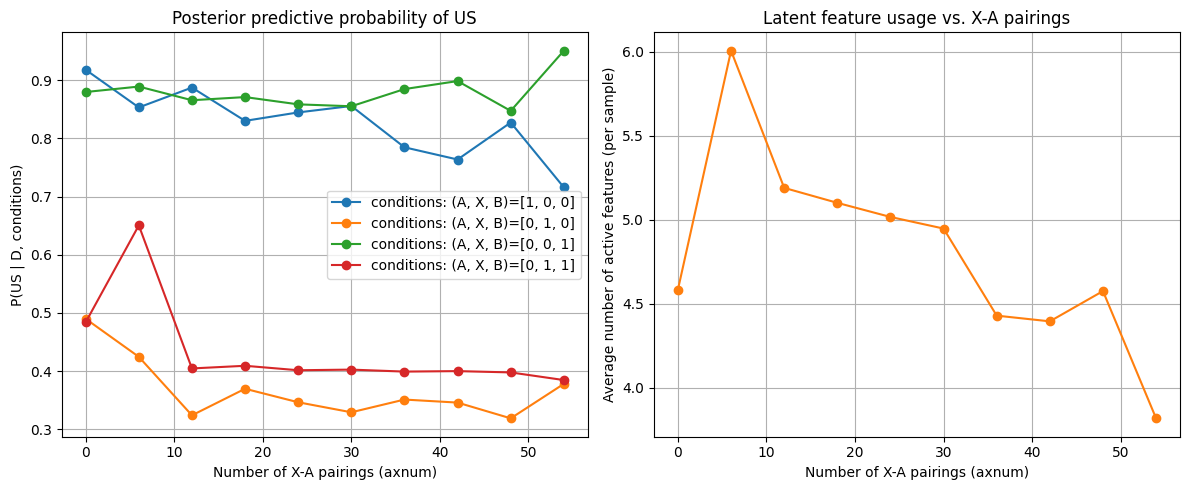

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# Settings
# ------------------------------
ax_values = [i for i in range(0, 60, 6)]
conds_list = [[1,0,0], [0,1,0], [0,0,1], [0,1,1]]
K = 15
n_iter = 1000
burn = 200
n_cond_gibbs = 5

# Storage for results
posterior_probs_all = {str(conds): [] for conds in conds_list}
avg_features = []

# ------------------------------
# Main loop over axnum
# ------------------------------
for axnum in ax_values:

    # Generate dataset
    Data = generate_data_second_order(axnum=axnum)
    
    # Run Gibbs sampler
    sampler = GibbsSamplerLLFM(Data, K=K, n_iter=n_iter, alpha=1, sigma_w=3.0, sigma_b=1, mu_b=-15.0)
    sampler.run(verbose=False)

    # ---- Posterior predictive probabilities ----
    for conds in conds_list:
        p_y3 = sampler.posterior_predictive(
            burn=burn, conds=conds, n_cond_gibbs=n_cond_gibbs
        )
        posterior_probs_all[str(conds)].append(p_y3)

    # ---- Average number of active features ----
    
    avg_features.append(sampler.feature_counter)

# ------------------------------
# Plot results
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Posterior predictive probabilities
for conds in conds_list:
    axes[0].plot(
        ax_values,
        posterior_probs_all[str(conds)],
        marker='o',
        label=f'conditions: (A, X, B)={conds}'
    )
axes[0].set_xlabel("Number of X-A pairings (axnum)")
axes[0].set_ylabel("P(US | D, conditions)")
axes[0].set_title("Posterior predictive probability of US")
axes[0].grid(True)
axes[0].legend()

# Average number of active features
axes[1].plot(ax_values, avg_features, marker='o', color='C1')
axes[1].set_xlabel("Number of X-A pairings (axnum)")
axes[1].set_ylabel("Average number of active features (per sample)")
axes[1].set_title("Latent feature usage vs. X-A pairings")
axes[1].grid(True)

plt.tight_layout()
#plt.savefig("posterior_predictive_and_features.png", dpi=300)
plt.show()
